# Plotagem do Grafo

    Dentro da célula de código abaixo, conta o código que utilizamos para plotar o nosso grafo.

Fizemos um grafo direcional, onde cada um dos vértices são times de futebol de diversas ligas, que tiveram suas transferências registradas entre na janeiro e agosto de 2025, ao todo compilamos dados de 313 clubes. Já as arestas, representam cada um dos sentidos das transferências, note que multiplas transferências podem ser feitas num mesmo sentido (nos aprofundamos nisso em outros arquivos), dito isso, visando não fazer uso de grafos direcionais e tendo consciência de que esses casos não representam nem 5% das arestas em um caso de multi grafo, optamos por usar um modelo de grafo simples direcional não-ponderado, registrando informações que podem vir a ser utéis em nossas análises, como datas, nomes, id's (do nosso banco de dados) e valores dentro de cada uma de suas respectivas arestas.


<function matplotlib.pyplot.show(close=None, block=None)>

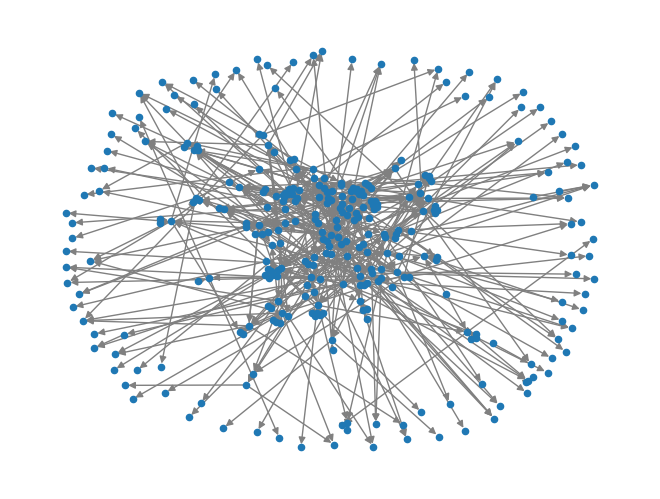

In [58]:
#Carregamento do arquivo .env
from dotenv import load_dotenv
import os
load_dotenv()

# FETCH da API
import requests
response = requests.get(os.getenv('GET_TRANSFERENCIAS'))
data = response.json()

# Criação do grafo e plotagem dos dados
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.DiGraph()

if response.status_code == 200:
    conexoes_jogadores = {}

    for registro in data['transferências']:
        if registro['jogador'] not in conexoes_jogadores.keys():
            conexoes_jogadores[registro['jogador']] = []

        conexoes_jogadores[registro['jogador']].append(registro)
        grafo.add_edge(registro['de'], registro['para'], weight=1, transferencias=[], quantidade_transferencias=1) 

    for jogador, conexoes in  conexoes_jogadores.items():
        for conexao in conexoes:
            grafo[conexao['de']][conexao['para']]['transferencias'].append({
                    'data': conexao['data'],
                    'jogador': conexao['jogador'],
                    'valor': conexao['valor'],
                    'id': conexao['id']
                    })
            
            grafo[conexao['de']][conexao['para']]['quantidade_transferencias'] = len(grafo[conexao['de']][conexao['para']]['transferencias'])
            grafo[conexao['de']][conexao['para']]['weight'] = 1 / grafo[conexao['de']][conexao['para']]['quantidade_transferencias']
 
layout = nx.spring_layout(grafo, k=0.5, scale=50) # Definição do layout usado no grafo

# Desenho do grafo
nx.draw(grafo, node_size=20, edge_color='gray', arrowsize=10)
plt.show

In [59]:
# Métricas 

## Métricas do Grafo

    Dentro das células abaixo, constam algumas das métricas extraídas do grafo.

In [56]:
print(f'DENSIDADE DO GRAFO:...{nx.density(grafo)}')
print(f'TAMANHO DO GRAFO:.....{grafo.number_of_edges()}')
print(f'ORDEM DO GRAFO:.......{grafo.number_of_nodes()}')
print(f'DIAMETRO DO GRAFO: Infinito (Grafo não é fortemente conectado)')

DENSIDADE DO GRAFO:...0.005201933316949291
TAMANHO DO GRAFO:.....508
ORDEM DO GRAFO:.......313
DIAMETRO DO GRAFO: Infinito (Grafo não é fortemente conectado)


## Métricas dos Elementos do Grafo

    Dentro das células abaixo, constam algumas métricas extraídas dos elementos do grafo

In [53]:
### Cálculo das Centralidades e Ranqueamento de Páginas

In [54]:
# DADOS DE CENTRALIDADE DO GRAFO
cent_vertices       = nx.degree_centrality(grafo)
cent_proximidade    = nx.closeness_centrality(grafo)
cent_intermediacao  = nx.betweenness_centrality(grafo)
cent_autovetor      = nx.eigenvector_centrality(grafo)
cent_out_dregree    = nx.out_degree_centrality(grafo)
cent_in_dregree     = nx.in_degree_centrality(grafo)

pagerank = nx.pagerank(grafo) # DADOS DE PAGERANK DO GRAFO

# ORGANIZAÇÃO DOS DADOS
cent_vertices       = dict(sorted(cent_vertices.items(), key=lambda item: item[1], reverse=True ))
cent_proximidade    = dict(sorted(cent_proximidade.items(), key=lambda item: item[1], reverse=True ))
cent_intermediacao  = dict(sorted(cent_intermediacao.items(), key=lambda item: item[1], reverse=True ))
cent_autovetor      = dict(sorted(cent_autovetor.items(), key=lambda item: item[1], reverse=True ))
cent_out_dregree    = dict(sorted(cent_out_dregree.items(), key=lambda item: item[1], reverse=True))
cent_in_dregree     = dict(sorted(cent_in_dregree.items(), key=lambda item: item[1], reverse=True))
pagerank            = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))

### Distribuição das Quantidades de Transferências por Sentido

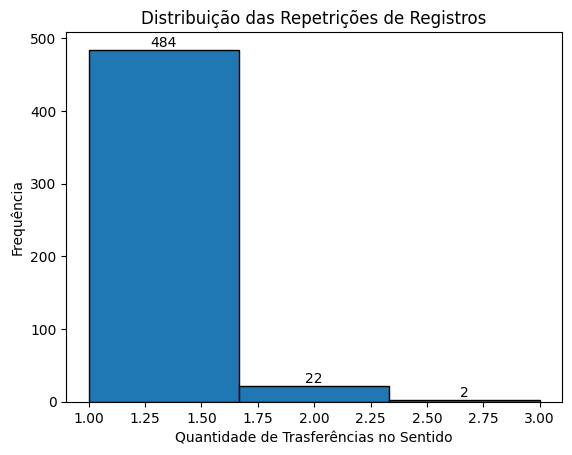

In [ ]:
dados = []
for aresta in grafo.edges:
    dados.append(grafo[aresta[0]][aresta[1]]['quantidade_transferencias'])

valores ,colunas, barras = plt.hist(dados, bins=3, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição das Repetrições de Registros')
plt.xlabel('Quantidade de Trasferências no Sentido')
plt.ylabel('Frequência')
plt.show()

## Histogramas do Grafo

    Dentro das células de código abaixo, constam alguns histogramas associados a métricas extraídas do grafo.

### Distribuição das Centralidade dos Vértices

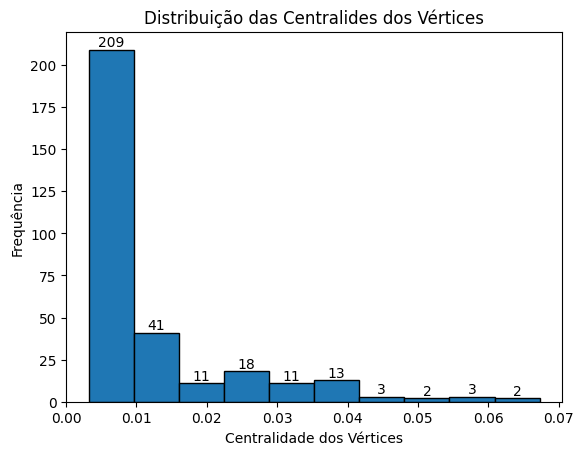

In [41]:
import matplotlib.pyplot as plt # Import para histogramas e gráficos

dados = []
for chave, valor in cent_vertices.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição das Centralides dos Vértices')
plt.xlabel('Centralidade dos Vértices')
plt.ylabel('Frequência')
plt.show()

### Histograma para Centralidade de Proximidade (Closeness)

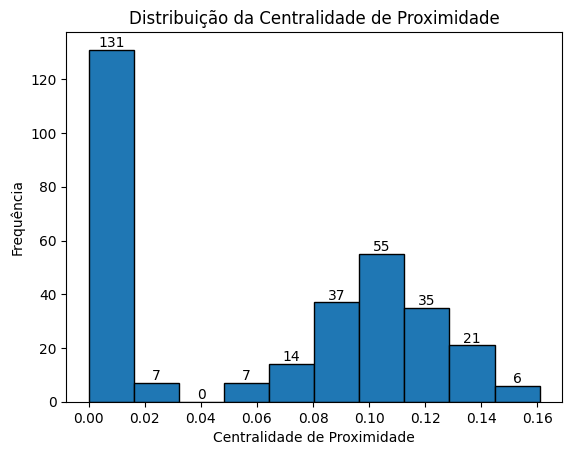

In [42]:
dados = []
for chave, valor in cent_proximidade.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Proximidade')
plt.xlabel('Centralidade de Proximidade')
plt.ylabel('Frequência')
plt.show()

In [26]:
### Distribuição da Centralidade de Intermediação

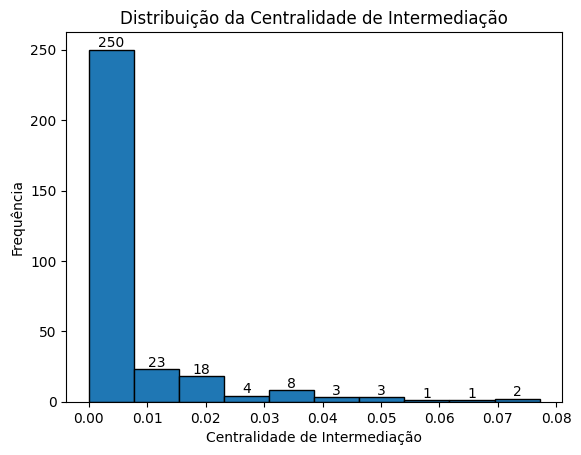

In [43]:
dados = []
for chave, valor in cent_intermediacao.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Intermediação')
plt.xlabel('Centralidade de Intermediação')
plt.ylabel("Frequência")
plt.show()

### Distribuição da Centralidade de Autovetor

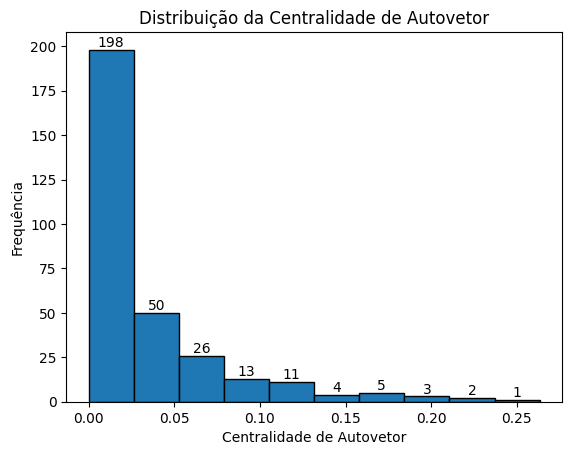

In [44]:
dados = []
for chave, valor in cent_autovetor.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Autovetor')
plt.xlabel('Centralidade de Autovetor')
plt.ylabel('Frequência')
plt.show()

### Distribuição da Centralidade de Grau de Saída

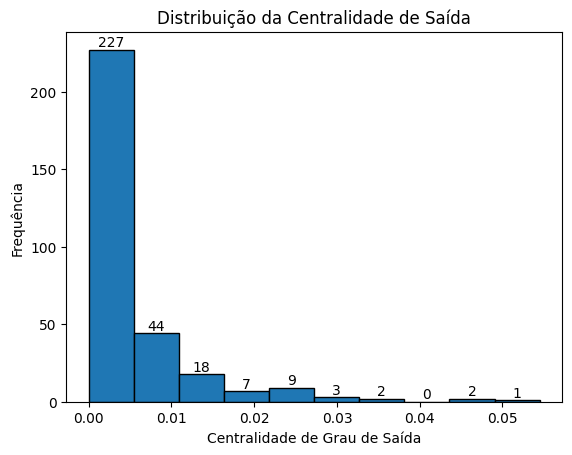

In [45]:
dados = []
for chave, valor in cent_out_dregree.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Saída')
plt.xlabel('Centralidade de Grau de Saída')
plt.ylabel('Frequência')
plt.show()

### Distribuição da Centralidade do Grau de Entrada

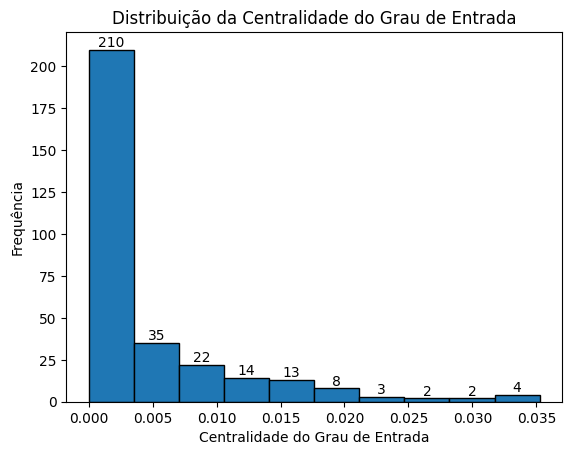

In [46]:
dados = []
for chave, valor in cent_in_dregree.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade do Grau de Entrada')
plt.xlabel('Centralidade do Grau de Entrada')
plt.ylabel('Frequência')
plt.show()

### Distribuição do Ranqueamento de Páginas

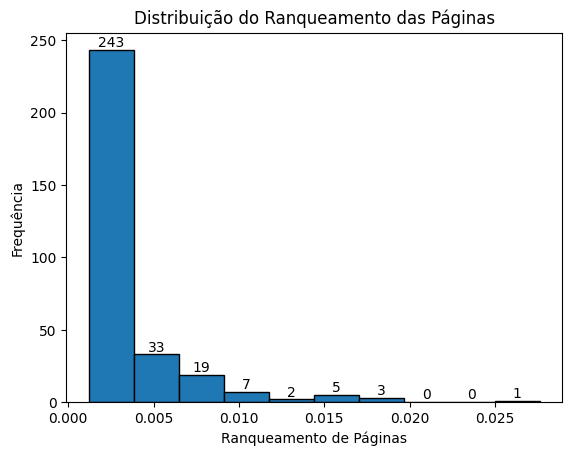

In [48]:
dados = []
for chave, valor in pagerank.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição do Ranqueamento das Páginas')
plt.xlabel('Ranqueamento de Páginas')
plt.ylabel('Frequência')
plt.show()

## Distribuição das Métricas entre os Vértices

In [ ]:
### Tabelas para Grau de Saída

Quantidade de Times com grau de saída >= 5: 32
Porcentagem que esse grupo representa: 10.22%


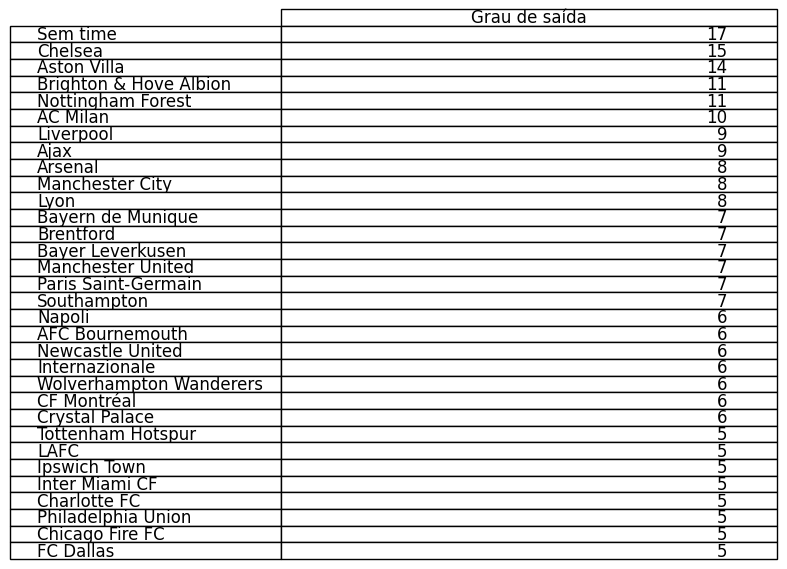

In [130]:
vertices_graus  = {}

labels_colunas  = ['Grau de saída']
valor_colunas   = []
valor_linhas    = []

minimo = int(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice in grafo.nodes:
    if grafo.out_degree(vertice) >= minimo:
        vertices_graus[vertice] = grafo.out_degree(vertice)

vertices_graus = dict(sorted(vertices_graus.items(), key=lambda item: item[1], reverse=True ))
print(f'Quantidade de Times com grau de saída >= {minimo}: {len(vertices_graus.items())}')
print(f'Porcentagem que esse grupo representa: {(len(vertices_graus.items()) / 313) * 100:.2f}%')

for vertice, grau in vertices_graus.items():
    valor_linhas.append(vertice)
    valor_colunas.append([grau])

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()


### Tabelas para Grau de Entrada

Quantidade de Times com grau de entrada >= 5: 32
Porcentagem que esse grupo representa: 10.22%


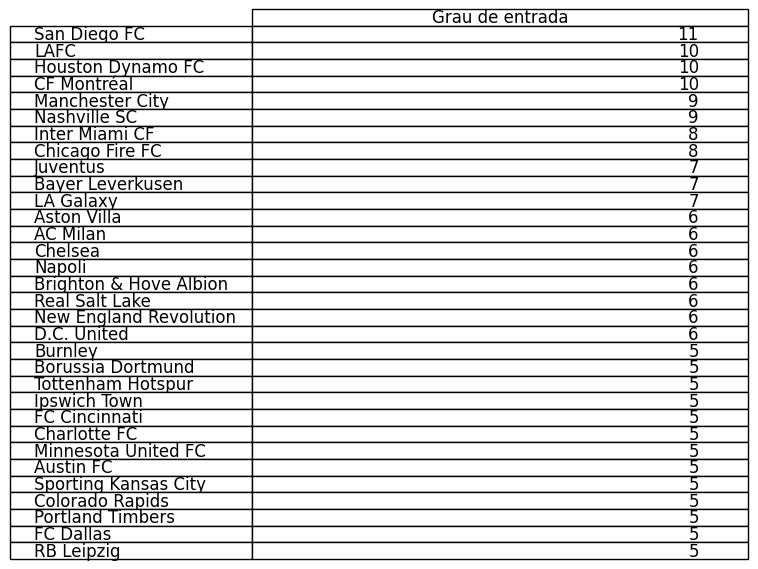

In [120]:
vertices_graus  = {}

labels_colunas  = ['Grau de entrada']
valor_colunas   = []
valor_linhas    = []

minimo = int(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice in grafo.nodes:
    if grafo.in_degree(vertice) >= minimo:
        vertices_graus[vertice] = grafo.in_degree(vertice)

vertices_graus = dict(sorted(vertices_graus.items(), key=lambda item: item[1], reverse=True ))
print(f'Quantidade de Times com grau de entrada >= {minimo}: {len(vertices_graus.items())}')
print(f'Porcentagem que esse grupo representa: {(len(vertices_graus.items()) / 313) * 100:.2f}%')

for vertice, grau in vertices_graus.items():
    valor_linhas.append(vertice)
    valor_colunas.append([grau])

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()

### Tabelas para Grau de Centralidade de Intermediação (Betweenness)

Quantidade de Times com Centralidade de Intermediação >= 0.01: 53
Porcentagem que esse grupo representa: 16.93%


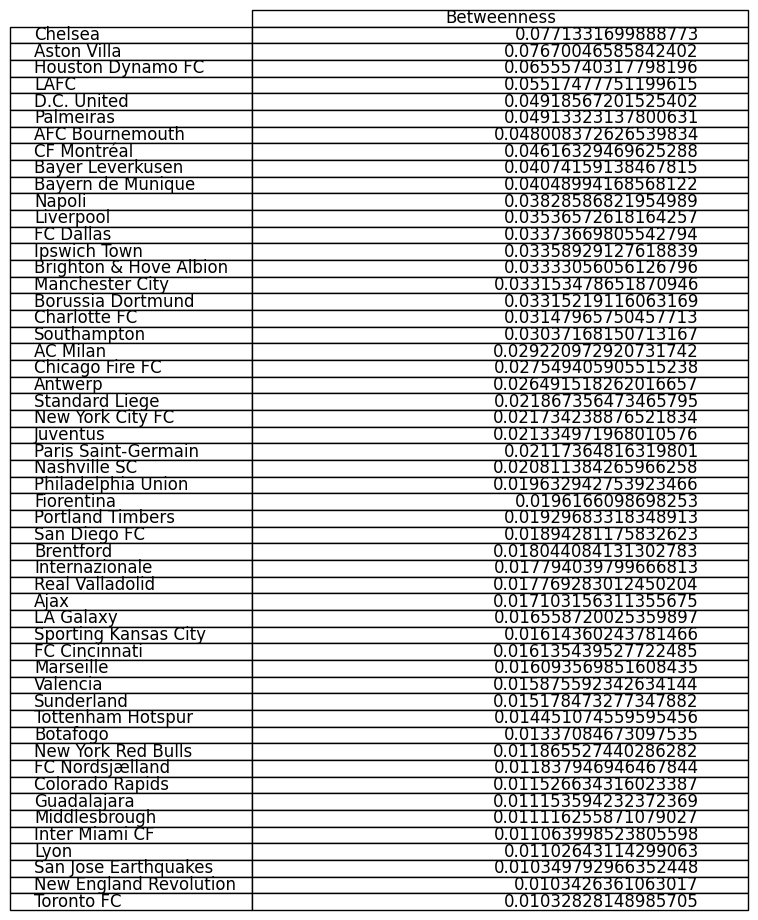

In [ ]:
vertices_centralidades  = nx.betweenness_centrality(grafo)
vertices_centralidades = dict(sorted(vertices_centralidades.items(), key=lambda item: item[1], reverse=True ))

labels_colunas  = ['Betweenness']
valor_colunas   = []
valor_linhas    = []

minimo = float(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice, centralidade in vertices_centralidades.items():
    if centralidade >= minimo:
        valor_linhas.append(vertice)
        valor_colunas.append([centralidade])

print(f'Quantidade de Times com Centralidade de Intermediação >= {minimo}: {len(valor_linhas)}')
print(f'Porcentagem que esse grupo representa: {(len(valor_linhas) / 313) * 100:.2f}%')

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()